Machine learning is a valuable tool used by businesses these days to enhance decision making. You can feed large amounts of data to a model, and let the model figure out which factors in the data have the most influence over your success.

Natalie’s is a small e-commerce company located in the heart of New York. They sell clothes online, but also have in-store style and clothing advice sessions. Customers walk into these sessions, meet with a personal stylist, then go back home and place orders for clothing. Orders are placed either on the company’s mobile app or on their website.

Let’s say Natalie’s has hired you as a data scientist to help them make a business decision. Here’s the question they want answered:

Should we focus our efforts more on the mobile app or on the website?

To help you make this decision, the company has provided you with a CSV file that contains statistics on how each customer uses their mobile app and their website.

The dataset
==========
Our dataset contains 500 customers, with the following information for each one:

Email (Customer’s email id)

Address (Customer’s home address)

Avatar (Colour selected by customer on their member profile)

Average session length (Minutes spent by customer on average for each in-store session)

Time on App (Minutes spent by customer on the app)

Time on Website (Minutes spent by customer on the website)

Length of Membership (Years the customer has been with Natalie’s)

Yearly Amount Spent (Money spent yearly by customer on Natalie’s)

Let’s see how we can go about analysing this dataset using Pandas and Scikit-learn.

### 1. Loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
customers = pd.read_csv('Ecommerce Customers.csv')

In [27]:
customers.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
customers.shape

(500, 8)

In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

### 2. Exploratory data analysis (EDA)

C:\Users\Nirmal Silwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


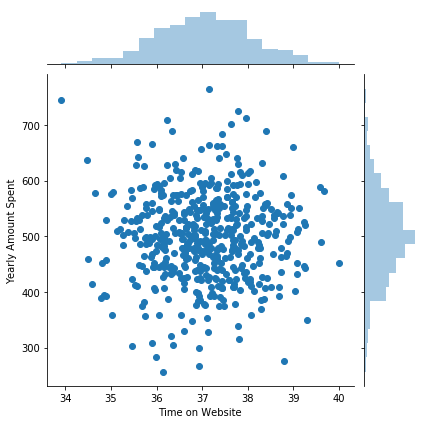

In [9]:
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent')

C:\Users\Nirmal Silwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


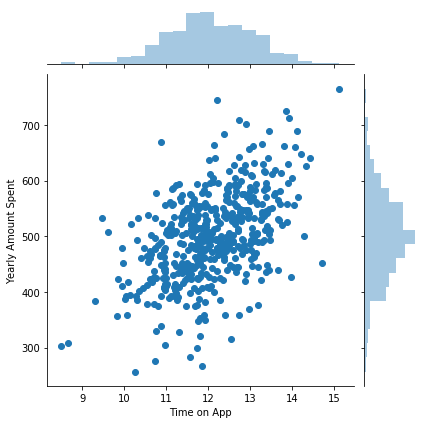

In [11]:
sns.jointplot(data=customers,x='Time on App',y='Yearly Amount Spent')

C:\Users\Nirmal Silwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


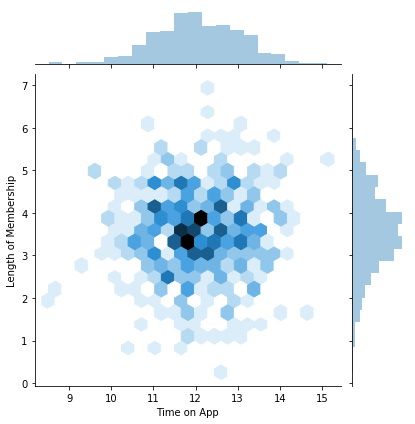

In [15]:
sns.jointplot(data=customers,x='Time on App',y='Length of Membership',kind='hex')

C:\Users\Nirmal Silwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


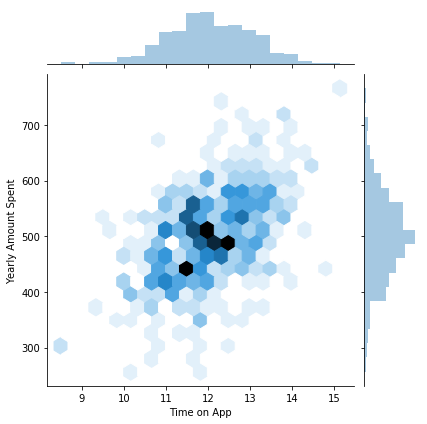

In [18]:
sns.jointplot(data=customers,x='Time on App',y='Yearly Amount Spent',kind='hex')

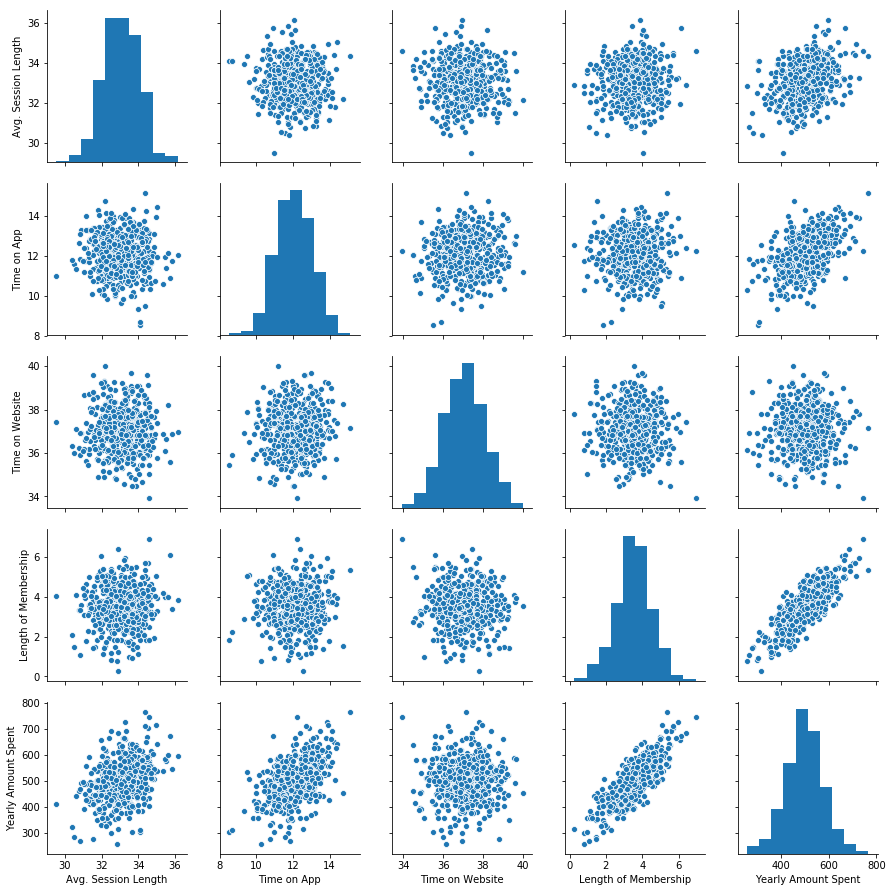

In [19]:
sns.pairplot(customers)

based on this visualization we came to know that Yearly amount spent is highly correlated with the length of the membership

C:\Users\Nirmal Silwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


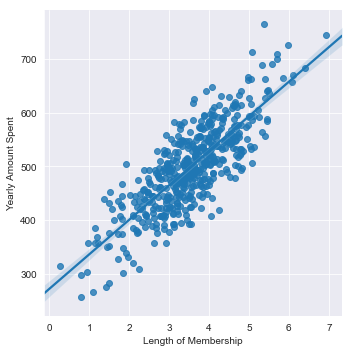

In [24]:
sns.set_style(style='darkgrid')
sns.lmplot(data=customers,x='Length of Membership',y='Yearly Amount Spent')

here we can visualize that longer the membership, more will be the yearly amount spent by that customer

C:\Users\Nirmal Silwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


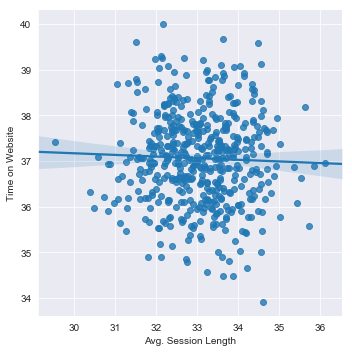

In [25]:
sns.lmplot(data=customers,x='Avg. Session Length',y='Time on Website')

### 3. Training and Tesing Data

In [31]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [33]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [32]:
y = customers['Yearly Amount Spent']

In [40]:
customers.columns[3:-1:]

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [42]:
customers[customers.columns[3:-1:]].head(2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034


In [43]:
x = customers[customers.columns[3:-1:]]

note: here 'y' variable is to be predicted (response variable) and 'x' defines the predictor variable

In [47]:
from sklearn.cross_validation import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### 4. Training the Model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [53]:
lm.intercept_

-1047.9327822502387

### 5. Predicting the Test Data

In [54]:
predictions = lm.predict(x_test)

In [55]:
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Text(0,0.5,'Predicted values')

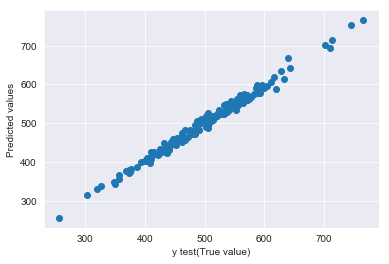

In [57]:
plt.scatter(y_test,predictions)
plt.xlabel('y test(True value)')
plt.ylabel('Predicted values')

### 6. Evaluating the Model

In [62]:
from sklearn import metrics

In [64]:
print('Mean Absolute Error is: {}'.format(metrics.mean_absolute_error(y_test,predictions)))

Mean Absolute Error is: 7.228148653430853


In [65]:
print('Mean Squared Error is: {}'.format(metrics.mean_squared_error(y_test,predictions)))

Mean Squared Error is: 79.81305165097487


In [67]:
print('Root Mean Squared Error is: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,predictions))))

Root Mean Squared Error is: 8.933815066978656


also computing the how much variance your model explains!

In [69]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

### Residuals

C:\Users\Nirmal Silwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


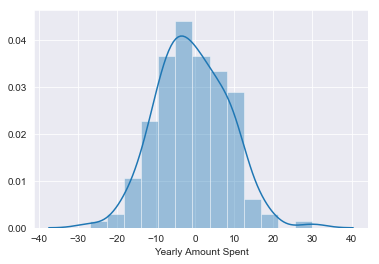

In [84]:
sns.distplot(y_test-predictions)
# residuals are the difference between the actual values and the predicted values

### Making the decision

Finally, we have to use our model to answer our original question: Should Natalie’s focus more on their mobile app or on their website?

Let’s recreate the coefficients as a dataframe and see which feature (time on app or time on website) has more influence on the yearly amount spent.

In [81]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

In [82]:
cdf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting these coefficients

### Note: 
Interpret them one at a time, say we consider first Avg. Session Legth, then if you hold all the others features fixed a 1 unit increase in the average session length is associated with the increase of around 26 dollar more spent.

Similarly, with all factors keeping constant, a 1 unit increase in Time on App is associated with the increase in 38 dollars more spent

### Conclusion

### From these coefficients, we can see that one minute on the app corresponds to 38.59 dollar in revenue, wehereas one minute on the website corresponds to just 0.19 dollar in revenue. Therefore, it is pretty clear from our linear regression model that if Natalie’s wants to increase profits, they should focus their efforts more on their app.